In [2]:
import pandas as pd
import numpy as np
#to plot the data
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline
import os
os.chdir("/Users/tomxu/Documents/NASA-Jet-Engine-Maintenance/Data/CMaps/")

In [3]:
def prepare_data(drop_cols=True):
    dependent_var = ['RUL']
    index_columns_names =  ["UnitNumber", "Cycle"]
    operational_settings_columns_names = ["OpSet"+str(i) for i in range(1,4)]
    sensor_measure_columns_names =["SensorMeasure"+str(i) for i in range(1,22)]
    input_file_column_names = index_columns_names + operational_settings_columns_names + sensor_measure_columns_names
    cols_to_drop = ['OpSet3', 'SensorMeasure1', 'SensorMeasure5', 'SensorMeasure6', 'SensorMeasure10',
                    'SensorMeasure14', 'SensorMeasure16', 'SensorMeasure18', 'SensorMeasure19']
    df_train = pd.read_csv('train_FD001.txt', delim_whitespace=True, names=input_file_column_names)
    rul = pd.DataFrame(df_train.groupby('UnitNumber')['Cycle'].max()).reset_index()
    rul.columns = ['UnitNumber', 'max']
    df_train = df_train.merge(rul, on=['UnitNumber'], how='left')
    df_train['RUL'] = df_train['max'] - df_train['Cycle']
    df_train.drop('max', axis=1, inplace=True)
    df_test = pd.read_csv('test_FD001.txt', delim_whitespace=True, names=input_file_column_names)    
    if(drop_cols == True):
        df_train = df_train.drop(cols_to_drop, axis=1)
        df_test = df_test.drop(cols_to_drop, axis=1)
    y_true = pd.read_csv('RUL_FD001.txt', delim_whitespace=True, names=["RUL"])
    y_true["UnitNumber"] = y_true.index    
    return df_train, df_test, y_true

In [4]:
df_train, df_test, y_true = prepare_data(drop_cols=True)
df_train.shape, df_test.shape, y_true.shape

((20631, 18), (13096, 17), (100, 2))

In [5]:
df_train

,UnitNumber,Cycle,OpSet1,OpSet2,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8.4956,397,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8.5139,395,38.30,23.1594,3
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8.5646,398,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8.5389,395,38.29,23.0640,1


In [6]:
def get_label_group(rul):
    if rul <= 50:
        return 'Urgent'
    elif rul >= 51 and rul <= 125:
        return 'Short'
    elif rul >= 126 and rul <= 200:
        return 'Medium'
    else:
        return 'Long'

df_train['Label'] = df_train['RUL'].apply(get_label_group)
df_train

,UnitNumber,Cycle,OpSet1,OpSet2,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,RUL,Label
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191,Medium
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190,Medium
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189,Medium
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188,Medium
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8.4956,397,38.49,22.9735,4,Urgent
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8.5139,395,38.30,23.1594,3,Urgent
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8.5646,398,38.44,22.9333,2,Urgent
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8.5389,395,38.29,23.0640,1,Urgent


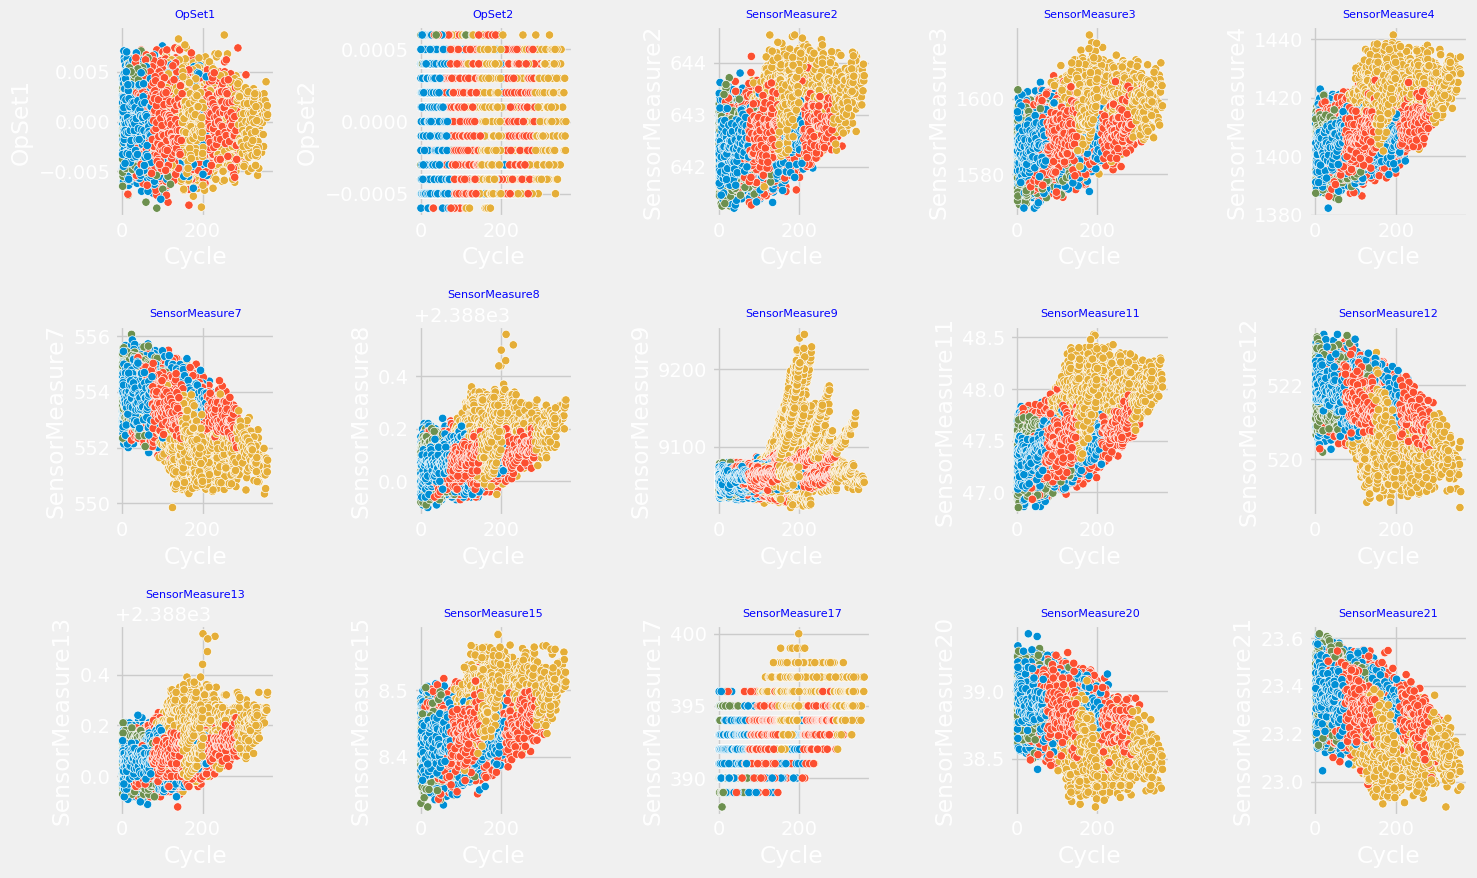

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 9))

for kk in range(1, 16):
    plt.subplot(3, 5, kk)
    sns.scatterplot(x='Cycle', y=df_train.iloc[:, 1 + kk], hue='Label', data=df_train)
    plt.title(df_train.columns[1 + kk], fontsize=8, color=[0, 0, 1])
    plt.legend().set_visible(False)

plt.tight_layout()
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler
feats = df_train.columns.drop(['UnitNumber', 'Cycle', 'RUL', "Label"])
std_scaler = StandardScaler()
df_train[feats] = std_scaler.fit_transform(df_train[feats])
df_test[feats] = std_scaler.transform(df_test[feats])

In [12]:
from sklearn.decomposition import PCA

# Extracting the selected columns for PCA
selected_data = df_train[feats]

# Performing PCA
pca = PCA()
wcoeff = pca.fit_transform(selected_data)

# Determine the number of principal components
num_components = wcoeff.shape[1]

# Creating a DataFrame with dynamic column names
score = pd.DataFrame(wcoeff, columns=[f'Principal Component {i + 1}' for i in range(num_components)])
score["Label"] = df_train['Label']
score

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,Principal Component 11,Principal Component 12,Principal Component 13,Principal Component 14,Principal Component 15,Label
0,-2.951544,-0.440120,-1.198484,-0.770999,0.830936,0.709659,-0.250967,0.013905,0.612198,0.225050,0.256506,-0.062500,-0.373699,-0.766431,-0.449149,Medium
1,-2.334373,-0.566075,-0.100705,-1.345184,0.978765,0.342274,0.034855,-0.330048,0.640034,0.081692,-0.194262,-0.167863,0.032749,0.406250,-0.729534,Medium
2,-2.960110,-0.459785,-0.737122,2.071258,0.610954,-1.071402,-0.516140,0.258324,0.119372,-0.145060,0.265044,-0.075620,0.795477,-0.017439,-0.036337,Medium
3,-3.365607,-0.905369,0.191465,-0.249441,-0.364328,-0.030637,0.160669,-0.117546,-1.180718,0.051249,0.497582,0.624421,1.229226,0.495532,0.274278,Medium
4,-2.411365,-0.124317,-1.087739,0.093439,-0.756667,0.322040,0.056714,-0.487738,0.240284,-0.108925,0.146170,-0.349197,0.468987,0.138490,0.091011,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,6.911526,-0.418163,-0.887796,-0.668939,-0.614182,0.583538,-0.044379,0.918033,-0.670036,-0.015721,-0.080844,-0.558163,-0.760156,0.305118,0.217175,Urgent
20627,7.058711,-0.425118,-1.775881,-0.763579,0.654311,-0.392172,-0.602791,-1.096928,-0.194517,0.455359,-0.412870,-0.908163,0.119560,0.035742,0.325188,Urgent
20628,8.037146,-0.280472,0.090336,-0.165074,-0.296360,1.152606,-0.309233,0.780331,0.418447,-1.193777,-0.676542,-0.603701,0.317154,0.272470,0.029483,Urgent
20629,7.786857,-0.372352,0.276885,1.055218,0.726346,-0.127163,-1.422842,-0.403649,0.104233,0.037129,-0.834693,-0.078401,-0.120951,-0.341488,-0.741230,Urgent


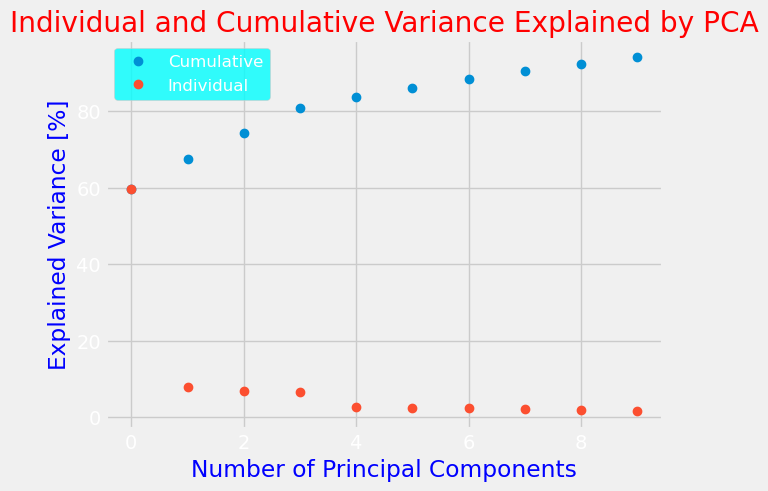

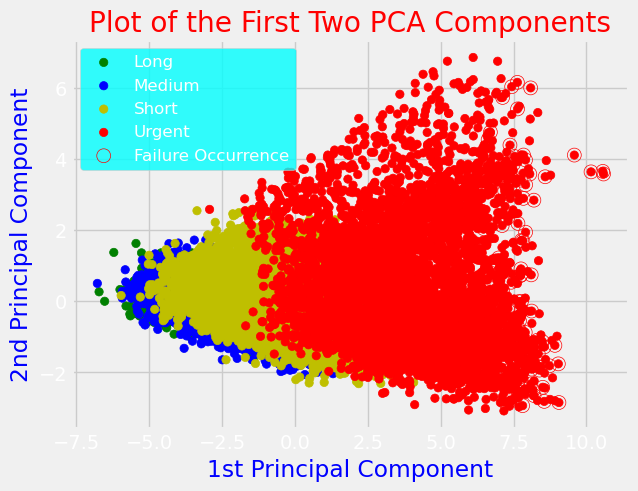

In [15]:
latent = pca.explained_variance_

# Plotting the individual and cumulative variance explained by PCA components
fig, ax = plt.subplots()
ax.plot(np.cumsum(latent[:10]) / np.sum(latent) * 100, 'o')
ax.plot(latent[:10] / np.sum(latent) * 100, 'o')
ax.set(xlabel='Number of Principal Components', ylabel='Explained Variance [%]',
       title='Individual and Cumulative Variance Explained by PCA')
ax.xaxis.label.set_color('blue')  # Color of xlabel
ax.yaxis.label.set_color('blue')  # Color of ylabel
ax.title.set_color('red')  # Color of title
ax.legend(['Cumulative', 'Individual'], loc='upper left', fontsize=12, facecolor=[0, 1, 1])
plt.show()

# Convert categorical labels to semantic color values
label_mapping = {'Urgent': 'r', 'Short': 'y', 'Medium': 'b', 'Long': 'g', 'Failure Occurrence': 'r'}
score['Label1'] = score['Label'].map(label_mapping)

# Creating a plot of the first two components
fig, ax = plt.subplots()
for label, d in score.groupby('Label'):
    s1 = ax.scatter(d.iloc[:, 0], d.iloc[:, 1], c=d['Label1'],
                    label=label)
idx = df_train.groupby(["UnitNumber"])["Cycle"].transform(max) == df_train['Cycle']
s2 = ax.scatter(score[idx].iloc[:, 0], score[idx].iloc[:, 1], marker='o', s=100,
                label="Failure Occurrence", facecolors='none', edgecolors='r')
ax.legend(loc='upper left', fontsize=12, facecolor=[0, 1, 1])
ax.set(xlabel='1st Principal Component', ylabel='2nd Principal Component',
       title='Plot of the First Two PCA Components')
ax.xaxis.label.set_color('blue')  # Color of xlabel
ax.yaxis.label.set_color('blue')  # Color of ylabel
ax.title.set_color('red')  # Color of title
plt.show()

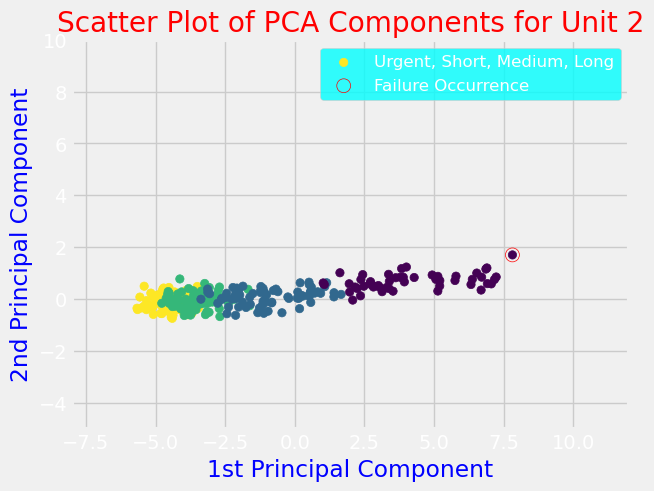

In [30]:
# Visualize a Trajectory of Unit-2 in 1st and 2nd Principal Components Plane
idx_unit = df_train['UnitNumber'] == 2
idx_failure = idx_unit & (df_train.groupby(["UnitNumber"])["Cycle"].transform(max) == df_train['Cycle'])

# Creating a scatter plot
fig, ax = plt.subplots()
s1 = ax.scatter(score.loc[idx_unit, "Principal Component 1"], score.loc[idx_unit, "Principal Component 2"],
                c=df_train.loc[idx_unit, 'Label'], label='Urgent, Short, Medium, Long')
ax.scatter(score.loc[idx_failure, "Principal Component 1"], score.loc[idx_failure, "Principal Component 2"],
           marker='o', s=100, label="Failure Occurrence", facecolors='none', edgecolors='r')
ax.legend(loc='upper right', fontsize=12, facecolor=[0, 1, 1])
ax.set(xlabel='1st Principal Component', ylabel='2nd Principal Component',
       title='Scatter Plot of PCA Components for Unit 2')
ax.xaxis.label.set_color('blue')  # Color of xlabel
ax.yaxis.label.set_color('blue')  # Color of ylabel
ax.title.set_color('red')  # Color of title
ax.set_xlim([-8, 12])
ax.set_ylim([-5, 10])
plt.show()

In [50]:
#create function to calculate Mahalanobis distance
def mahalanobis_distance(x, mean, cov_inv):
    """
    Calculate Mahalanobis distance for a point or array of points.

    Parameters:
    - x: Data point or array of points (shape: (n_samples, n_features))
    - mean: Mean vector of the distribution
    - cov_inv: Inverse of the covariance matrix

    Returns:
    - distances: Mahalanobis distances for each point
    """
    mean = mean.values.reshape((1, -1))  # Reshape mean to have the same number of columns as x
    diff = x - mean
    distances = np.sqrt(np.sum(diff @ cov_inv * diff, axis=1))
    return distances

In [53]:
# Calculate the thresholds of Mahalanobis distance to detect 5%, 1%, and 0.1% outliers
idx = (df_train['Label'] == 3)
th = [0.001, 0.01, 0.05]
C = [None] * 3

# Assuming 'mean' is the mean vector and 'cov_inv' is the inverse of the covariance matrix
mean = np.mean(score[idx].iloc[:, :2], axis=0)
cov_inv = np.linalg.inv(np.cov(score[idx].iloc[:, :2].T))

# Calculate the Mahalanobis distance for each data
d = 0.1
x1Grid, x2Grid = np.meshgrid(np.arange(-8, 8.1, d), np.arange(-8, 8.1, d))
Grid = np.column_stack((x1Grid.ravel(), x2Grid.ravel()))
print(Grid.shape, mean.shape, cov_inv.shape)

aGrid = mahalanobis_distance(Grid, mean, cov_inv)
aGrid = aGrid.reshape(x1Grid.shape)
aGrid

(25921, 2) (2,) (2, 2)


array([[20.53674668, 20.48211184, 20.42760986, ..., 14.4580788 ,
        14.44284654, 14.4279932 ],
       [20.31386114, 20.25913568, 20.20454405, ..., 14.25478565,
        14.24006217, 14.22572406],
       [20.09103939, 20.03622147, 19.98153836, ..., 14.05217793,
        14.03797863, 14.02417132],
       ...,
       [15.7248068 , 15.75742275, 15.79033223, ..., 23.4706811 ,
        23.53084203, 23.5910911 ],
       [15.94577573, 15.97858783, 16.01168861, ..., 23.68837199,
        23.7484169 , 23.80854975],
       [16.16687656, 16.19987919, 16.23316579, ..., 23.90621222,
        23.96614286, 24.0261612 ]])

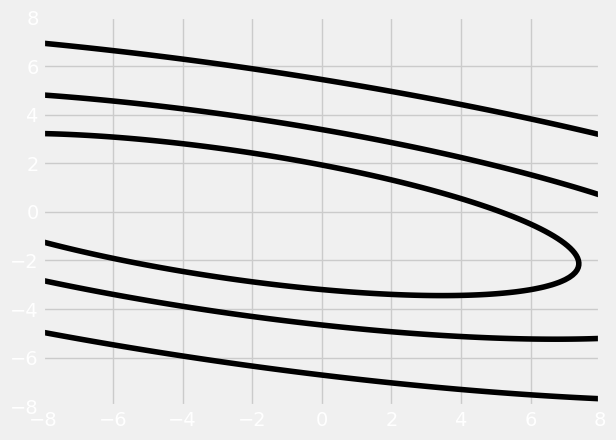

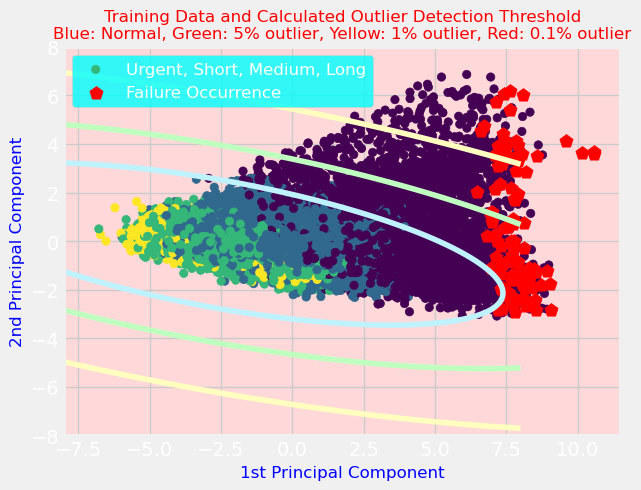

In [62]:
# Calculate the thresholds to detect 5%, 1%, and 0.1% outliers on the first two components
from scipy.stats import chi2
contours = []
for kk in range(3):
    lev = chi2.ppf(1 - th[kk], 2)
    contours.append(plt.contour(x1Grid, x2Grid, aGrid, levels=[lev], colors='k'))

# Set the color for 5%, 1%, and 0.1% outlier regions
col5per = [0.75, 0.95, 1]
col1per = [0.75, 1, 0.75]
col01per = [1, 1, 0.75]
colAnomaly = [1, 0.85, 0.85]

# Set the color for 5%, 1%, and 0.1% outlier regions
colors = [col01per, col1per, col5per]

# Plot the result
plt.figure()
for kk, contour in enumerate(contours):
    plt.contour(contour, colors=[colors[kk]])

# Plot the result
# plt.figure()
# for kk in range(3):
#     plt.contour(C[kk], color=col01per if kk == 0 else (col1per if kk == 1 else col5per))

s1 = plt.scatter(score.iloc[:, 0], score.iloc[:, 1], c=df_train['Label'], label='Urgent, Short, Medium, Long')
idx = (df_train.groupby(["UnitNumber"])["Cycle"].transform(max) == df_train['Cycle'])
s2 = plt.scatter(score[idx].iloc[:, 0], score[idx].iloc[:, 1], c='r', marker='p', s=100, facecolors='w', label='Failure Occurrence')
plt.legend(handles=[s1, s2], loc='upper left', fontsize=12, facecolor=[0, 1, 1])
plt.gca().set_facecolor(colAnomaly)
plt.box(True)  # Set the box around the plot
plt.gca().set_axis_on()
# Set the color of xlabel, ylabel, and title
plt.xlabel('1st Principal Component', fontsize=12, color='blue')
plt.ylabel('2nd Principal Component', fontsize=12, color='blue')
plt.title('Training Data and Calculated Outlier Detection Threshold\n'
          'Blue: Normal, Green: 5% outlier, Yellow: 1% outlier, Red: 0.1% outlier', fontsize=12, color='red')

plt.show()